In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
sns.set(color_codes=True)
%matplotlib inline
df_all = pd.read_csv('C:\\Users\\Brend\\Downloads\\correlation_top42.csv', index_col = 'name', encoding = "UTF-8")
print("Total: %d authors" % df_all.shape[0])

Total: 1965872 authors


In [4]:
df_trimmed = df_all[df_all['num_pubs'] >= 50]
df_trimmed = df_trimmed[df_trimmed['TotalConns'] >= 25]
print("Remaining after trimming: %d authors" % df_trimmed.shape[0])

Remaining after trimming: 368618 authors


In [6]:
linear_metrics = ['pct_collab_linauth', 'pct_collab_linprof', 
                  'pct_collab_sqrtauth', 'pct_collab_sqrtprof', 
                  'pct_collab_unweighted', 'InterClusterRatio', 
                  'IntraClusterRatio']
log_metrics = ['IntraCommunityFocus', 'InterCommunityFocus']
all_metrics = linear_metrics + log_metrics
impact = ['avg_PR', 'max_PR', 'median_PR','min_PR', 'avg_AR', 'max_AR', 'median_AR', 'min_AR']


In [7]:
df_log = df_trimmed.copy()
for col in df_trimmed.columns:
    log_col = df_log[[col]]
    df_log[col + '_log'] = log_col.apply(np.log, axis=0)
df_log = df_log[[col for col in df_log.columns if 'log' in col]]

In [9]:
df_log_adjusted = df_trimmed.copy()
for col in df_trimmed.columns:
    log_col = df_log_adjusted[[col]]
    df_log_adjusted[col + '_log'] = log_col.apply(lambda x: np.log(x+1), axis=0)
df_log_adjusted = df_log_adjusted[[col for col in df_log_adjusted.columns if 'log' in col]]

In [8]:
from sklearn.preprocessing import StandardScaler
df_scaled = df_trimmed.copy()
for col in df_trimmed.columns:
    ss = StandardScaler()
    scaled_col = df_scaled[[col]]
    df_scaled[col + '_zscore'] = ss.fit_transform(scaled_col)
df_zscores = df_scaled[[col for col in df_scaled.columns if 'zscore' in col]]

In [10]:
import numpy as np
from sklearn.linear_model import LinearRegression
print('r2 scores:')
d = dict()
for x_col in linear_metrics:
    score_list = []
    index_list = []
    for y_col in impact:
        X = df_zscores[[x_col + '_zscore']]
        y = df_log[[y_col + '_log']]
        reg = LinearRegression().fit(X, y)
        score = round(reg.score(X, y), 4)
        score_list.append(score)
        index_list.append(y_col)
    d[x_col + '_zscore'] = pd.Series(score_list, index=index_list)
df_r2 = pd.DataFrame(d)
df_r2

r2 scores:


,pct_collab_linauth_zscore,pct_collab_linprof_zscore,pct_collab_sqrtauth_zscore,pct_collab_sqrtprof_zscore,pct_collab_unweighted_zscore,InterClusterRatio_zscore,IntraClusterRatio_zscore
avg_PR,0.0976,0.0696,0.1281,0.0988,0.1257,0.0003,0.0003
max_PR,0.0430,0.0084,0.0407,0.0198,0.0525,0.0018,0.0018
median_PR,0.1193,0.1275,0.1653,0.1489,0.1343,0.0000,0.0000
min_PR,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
avg_AR,0.0748,0.0767,0.1182,0.1114,0.1436,0.0008,0.0008
max_AR,0.0328,0.0111,0.0383,0.0260,0.0664,0.0007,0.0007
median_AR,0.1047,0.1314,0.1573,0.1553,0.1423,0.0000,0.0000
min_AR,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [11]:
print('coef_:')
d = dict()
for x_col in linear_metrics:
    score_list = []
    index_list = []
    for y_col in impact:
        X = df_zscores[[x_col + '_zscore']]
        y = df_log[[y_col + '_log']]
        reg = LinearRegression().fit(X, y)
        score = round(reg.score(X, y), 4)
        score_list.append(round(reg.coef_[0][0], 4))
        index_list.append(y_col)
    d[x_col + '_zscore'] = pd.Series(score_list, index=index_list)
df_r2 = pd.DataFrame(d)
df_r2

coef_:


,pct_collab_linauth_zscore,pct_collab_linprof_zscore,pct_collab_sqrtauth_zscore,pct_collab_sqrtprof_zscore,pct_collab_unweighted_zscore,InterClusterRatio_zscore,IntraClusterRatio_zscore
avg_PR,0.1474,0.1244,0.1688,0.1482,0.1672,-0.0076,0.0076
max_PR,0.2303,0.1018,0.2240,0.1562,0.2545,0.0467,-0.0467
median_PR,0.0806,0.0833,0.0949,0.0900,0.0855,-0.0007,0.0007
min_PR,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-0.0000
avg_AR,0.0986,0.0998,0.1239,0.1203,0.1365,-0.0104,0.0104
max_AR,0.1840,0.1074,0.1990,0.1638,0.2619,0.0264,-0.0264
median_AR,0.0537,0.0602,0.0659,0.0654,0.0627,-0.0004,0.0004
min_AR,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-0.0000


In [12]:
import numpy as np
from sklearn.linear_model import LinearRegression
print('r2 scores:')
d = dict()
for x_col in log_metrics:
    score_list = []
    index_list = []
    for y_col in impact:
        X = df_log_adjusted[[x_col + '_log']]
        y = df_log[[y_col + '_log']]
        reg = LinearRegression().fit(X, y)
        score = round(reg.score(X, y), 4)
        score_list.append(score)
        index_list.append(y_col)
    d[x_col + '_log'] = pd.Series(score_list, index=index_list)
df_r2 = pd.DataFrame(d)
df_r2

r2 scores:


,IntraCommunityFocus_log,InterCommunityFocus_log
avg_PR,0.0103,0.0006
max_PR,0.0077,0.0013
median_PR,0.0102,0.0001
min_PR,0.0000,0.0000
avg_AR,0.0134,0.0004
max_AR,0.0098,0.0010
median_AR,0.0121,0.0002
min_AR,0.0000,0.0000


In [13]:
print('coef_:')
d = dict()
for x_col in log_metrics:
    score_list = []
    index_list = []
    for y_col in impact:
        X = df_log_adjusted[[x_col + '_log']]
        y = df_log[[y_col + '_log']]
        reg = LinearRegression().fit(X, y)
        score = round(reg.score(X, y), 4)
        score_list.append(round(reg.coef_[0][0], 4))
        index_list.append(y_col)
    d[x_col + '_log'] = pd.Series(score_list, index=index_list)
df_r2 = pd.DataFrame(d)
df_r2

coef_:


,IntraCommunityFocus_log,InterCommunityFocus_log
avg_PR,0.1183,0.0375
max_PR,0.2411,0.1242
median_PR,0.0583,-0.0082
min_PR,-0.0000,0.0000
avg_AR,0.1032,0.0224
max_AR,0.2495,0.0990
median_AR,0.0453,-0.0065
min_AR,-0.0000,0.0000


In [20]:
print("Computing regularization path using the coordinate descent lasso...")
import time
from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC
t1 = time.time()
y_col = 'median_PR'
X = df_zscores[[x_col + '_zscore' for x_col in linear_metrics]]
y = df_log[y_col + '_log']

model = LassoCV(cv=20).fit(X, y)
t_lasso_cv = time.time() - t1


Computing regularization path using the coordinate descent lasso...


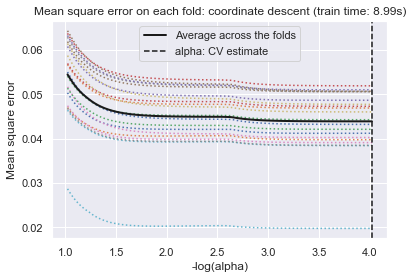

In [26]:
# Display results
m_log_alphas = -np.log10(model.alphas_)

plt.figure()
plt.plot(m_log_alphas, model.mse_path_, ':')
plt.plot(m_log_alphas, model.mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha: CV estimate')

plt.legend()

plt.xlabel('-log(alpha)')
plt.ylabel('Mean square error')
plt.title('Mean square error on each fold: coordinate descent '
          '(train time: %.2fs)' % t_lasso_cv)
plt.axis('tight')
plt.show()